This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 784)

In [3]:
train_images_with_noise_channels.shape

(60000, 1568)

In [4]:
train_images_with_zeros_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6100 - accuracy: 0.8109 - val_loss: 0.3547 - val_accuracy: 0.8930
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2525 - accuracy: 0.9221 - val_loss: 0.2188 - val_accuracy: 0.9344
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1670 - accuracy: 0.9495 - val_loss: 0.1650 - val_accuracy: 0.9488
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1205 - accuracy: 0.9623 - val_loss: 0.1286 - val_accuracy: 0.9625
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0868 - accuracy: 0.9728 - val_loss: 0.1315 - val_accuracy: 0.9612
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0649 - accuracy: 0.9798 - val_loss: 0.1259 - val_accuracy: 0.9639
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.1233 - val_accuracy: 0.9653
Epoch 

In [6]:
import numpy as np


**Plotting a validation accuracy comparison**

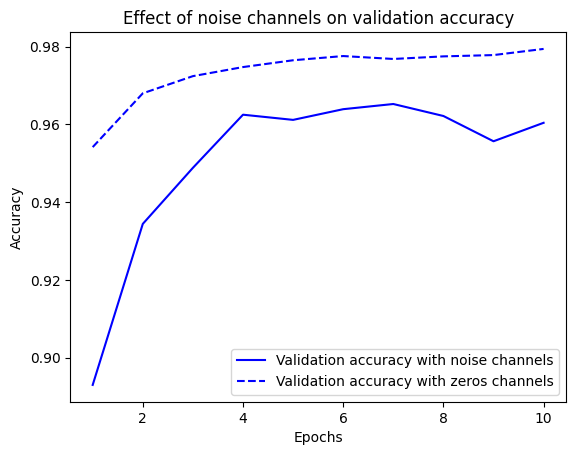

In [7]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3174 - accuracy: 0.1029 - val_loss: 2.3061 - val_accuracy: 0.1063
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2994 - accuracy: 0.1169 - val_loss: 2.3108 - val_accuracy: 0.1039
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2910 - accuracy: 0.1271 - val_loss: 2.3142 - val_accuracy: 0.1043
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2784 - accuracy: 0.1384 - val_loss: 2.3245 - val_accuracy: 0.1004
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2628 - accuracy: 0.1530 - val_loss: 2.3373 - val_accuracy: 0.0990
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2427 - accuracy: 0.1665 - val_loss: 2.3439 - val_accuracy: 0.0985
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2195 - accuracy: 0.1800 - val_loss: 2.3691 - val_accuracy: 0.0985

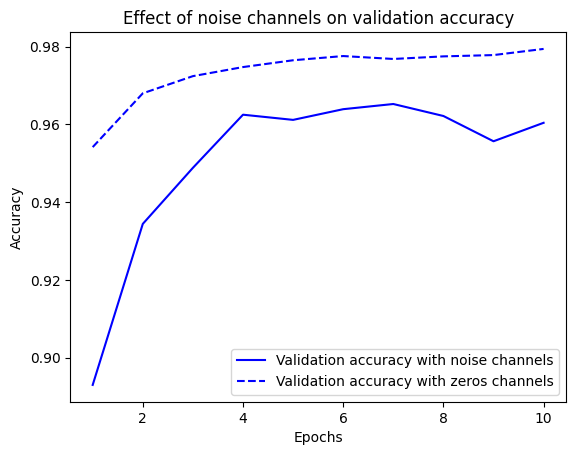

In [11]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 758.8403 - accuracy: 0.4252 - val_loss: 2.2136 - val_accuracy: 0.2533
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.8251 - accuracy: 0.2646 - val_loss: 2.3347 - val_accuracy: 0.2364
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.5649 - accuracy: 0.2558 - val_loss: 2.2009 - val_accuracy: 0.2450
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9480 - accuracy: 0.2325 - val_loss: 2.3449 - val_accuracy: 0.2378
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4017 - accuracy: 0.2270 - val_loss: 2.2103 - val_accuracy: 0.2116
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3848 - accuracy: 0.2296 - val_loss: 2.1989 - val_accuracy: 0.2176
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4553 - accuracy: 0.2473 - val_loss: 2.2444 - val_accuracy: 0.3038
Epoc

**The same model with a more appropriate learning rate**

In [10]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3660 - accuracy: 0.9138 - val_loss: 0.1408 - val_accuracy: 0.9607
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1289 - accuracy: 0.9640 - val_loss: 0.1414 - val_accuracy: 0.9642
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0959 - accuracy: 0.9750 - val_loss: 0.1451 - val_accuracy: 0.9666
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.9792 - val_loss: 0.1446 - val_accuracy: 0.9722
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9824 - val_loss: 0.1369 - val_accuracy: 0.9749
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0588 - accuracy: 0.9852 - val_loss: 0.1572 - val_accuracy: 0.9759
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0535 - accuracy: 0.9866 - val_loss: 0.1704 - val_accuracy: 0.9743
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [15]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6624 - accuracy: 0.8337 - val_loss: 0.3608 - val_accuracy: 0.9021
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.9025 - val_loss: 0.3085 - val_accuracy: 0.9158
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.9115 - val_loss: 0.2921 - val_accuracy: 0.9202
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3023 - accuracy: 0.9159 - val_loss: 0.2837 - val_accuracy: 0.9193
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2924 - accuracy: 0.9185 - val_loss: 0.2814 - val_accuracy: 0.9216
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2860 - accuracy: 0.9203 - val_loss: 0.2741 - val_accuracy: 0.9248
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.9218 - val_loss: 0.2703 - val_accuracy: 0.9267
Epoch 

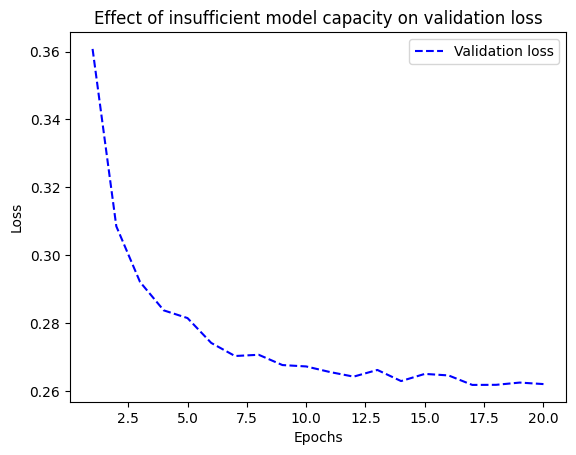

In [16]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [17]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3523 - accuracy: 0.9017 - val_loss: 0.1763 - val_accuracy: 0.9491
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1573 - accuracy: 0.9533 - val_loss: 0.1634 - val_accuracy: 0.9499
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1096 - accuracy: 0.9669 - val_loss: 0.1085 - val_accuracy: 0.9682
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0836 - accuracy: 0.9749 - val_loss: 0.1004 - val_accuracy: 0.9698
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9794 - val_loss: 0.0893 - val_accuracy: 0.9724
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0552 - accuracy: 0.9838 - val_loss: 0.0985 - val_accuracy: 0.9707
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0852 - val_accuracy: 0.9734
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [18]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 83ms/step - loss: 0.5362 - accuracy: 0.7598 - val_loss: 0.4149 - val_accuracy: 0.8605
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3310 - accuracy: 0.8937 - val_loss: 0.3557 - val_accuracy: 0.8538
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2454 - accuracy: 0.9225 - val_loss: 0.2860 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1930 - accuracy: 0.9390 - val_loss: 0.2791 - val_accuracy: 0.8917
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1616 - accuracy: 0.9473 - val_loss: 0.3022 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1347 - accuracy: 0.9587 - val_loss: 0.3174 - val_accuracy: 0.8775
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1133 - accurac

**Version of the model with lower capacity**

In [19]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.6073 - accuracy: 0.7013 - val_loss: 0.5518 - val_accuracy: 0.7383
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5181 - accuracy: 0.8153 - val_loss: 0.5085 - val_accuracy: 0.8244
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4745 - accuracy: 0.8645 - val_loss: 0.4971 - val_accuracy: 0.7974
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4451 - accuracy: 0.8891 - val_loss: 0.4880 - val_accuracy: 0.8101
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4217 - accuracy: 0.9069 - val_loss: 0.4587 - val_accuracy: 0.8702
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4018 - accuracy: 0.9249 - val_loss: 0.4525 - val_accuracy: 0.8674
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3845 - accuracy: 0.9353 - val_loss: 0.4417 - val_accuracy: 0.8843
Epoch 8/20
30

**Version of the model with higher capacity**

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5676 - accuracy: 0.7585 - val_loss: 0.4217 - val_accuracy: 0.8037
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3359 - accuracy: 0.8598 - val_loss: 0.3291 - val_accuracy: 0.8612
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2372 - accuracy: 0.9065 - val_loss: 0.3308 - val_accuracy: 0.8620
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1908 - accuracy: 0.9247 - val_loss: 0.2757 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1451 - accuracy: 0.9479 - val_loss: 0.2957 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1086 - accuracy: 0.9625 - val_loss: 0.5995 - val_accuracy: 0.7969
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0896 - accuracy: 0.9691 - val_loss: 0.3372 - val_accuracy: 0.8866
Epoch 8/20
30

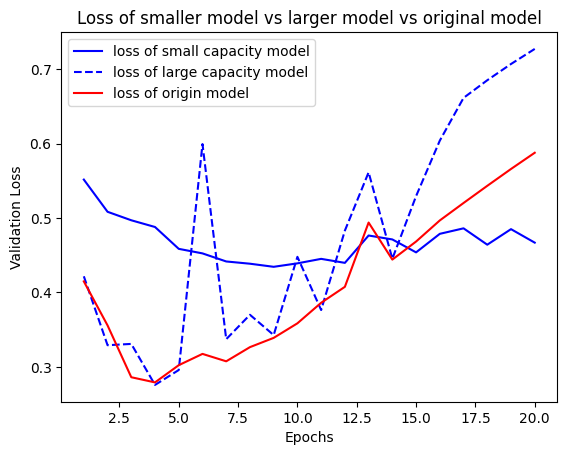

In [22]:
import matplotlib.pyplot as plt
small_loss = history_smaller_model.history["val_loss"]
larger_loss = history_larger_model.history["val_loss"]
origin_loss = history_original.history["val_loss"]


epochs = range(1, 21)
plt.plot(epochs, small_loss, "b-",
         label="loss of small capacity model")
plt.plot(epochs, larger_loss, "b--",
         label="loss of large capacity model")
plt.plot(epochs, origin_loss, "r",
         label="loss of origin model")
plt.title("Loss of smaller model vs larger model vs original model")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()


#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [23]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.6249 - accuracy: 0.7684 - val_loss: 0.4731 - val_accuracy: 0.8742
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4094 - accuracy: 0.8893 - val_loss: 0.3952 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3367 - accuracy: 0.9137 - val_loss: 0.3693 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2982 - accuracy: 0.9257 - val_loss: 0.3763 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2721 - accuracy: 0.9371 - val_loss: 0.3907 - val_accuracy: 0.8754
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2561 - accuracy: 0.9411 - val_loss: 0.3740 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2490 - accuracy: 0.9423 - val_loss: 0.3822 - val_accuracy: 0.8795
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [24]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 67ms/step - loss: 0.6327 - accuracy: 0.6341 - val_loss: 0.5148 - val_accuracy: 0.8467
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.5130 - accuracy: 0.7603 - val_loss: 0.4073 - val_accuracy: 0.8726
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4294 - accuracy: 0.8199 - val_loss: 0.3484 - val_accuracy: 0.8783
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3703 - accuracy: 0.8559 - val_loss: 0.3001 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3215 - accuracy: 0.8787 - val_loss: 0.2941 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2875 - accuracy: 0.8965 - val_loss: 0.2740 - val_accuracy: 0.8904
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2536 - accuracy: 0.9119 - val_loss: 0.2767 - val_accuracy: 0.8911
Epoch 8/20
30

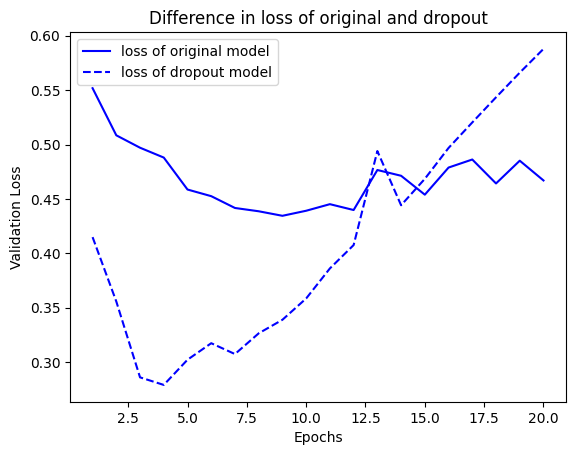

In [31]:
import matplotlib.pyplot as plt
origin_loss = history_original.history["val_loss"]
dropout_loss = history_dropout.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, small_loss, "b-",
         label="loss of original model")
plt.plot(epochs, origin_loss, "b--",
        label="loss of dropout model")
plt.title("Difference in loss of original and dropout")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()

## Summary